# Machine Learning
This notebook contains all the code necessary to wrangle data for machine learning, perform some EDA and build models/assess feature importance.
In general, this notebook takes a few hours to run; specifically the permutation feature importance cell take the longest to complete.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from scipy.stats import f_oneway
from scipy.stats import linregress

# Load in sets

In [2]:
#df_calendar = pd.read_csv('calendar.csv')
df_listings = pd.read_csv('listings.csv')
#df_neighborhoods = pd.read_csv('neighbourhoods.csv')
#df_reviews = pd.read_csv('reviews.csv')

print(df_listings.shape)
df_listings.head()

(4945, 75)


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,763278557466324285,https://www.airbnb.com/rooms/763278557466324285,20231220035904,2023-12-20,city scrape,Home in Portland · ★4.92 · 1 bedroom · 1 bed ·...,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,5386496,...,5.00,4.92,4.83,City registration pending,f,1,1,0,0,2.68
1,54342436,https://www.airbnb.com/rooms/54342436,20231220035904,2023-12-20,previous scrape,Home in Portland · ★5.0 · 2 bedrooms · 2 beds ...,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,205079895,...,4.97,4.96,4.90,City registration pending,f,11,11,0,0,3.06
2,51554340,https://www.airbnb.com/rooms/51554340,20231220035904,2023-12-20,city scrape,Guest suite in Portland · ★4.81 · Studio · 1 b...,NaN,NaN,https://a0.muscache.com/pictures/a5b8bd79-25cd...,95479282,...,4.85,4.63,4.93,2018-245298-000-00-HO,f,1,1,0,0,1.06
3,39727402,https://www.airbnb.com/rooms/39727402,20231220035904,2023-12-20,previous scrape,Home in Portland · 2 bedrooms · 1 bed · 3.5 sh...,NaN,NaN,https://a0.muscache.com/pictures/04c2485d-31cb...,85532744,...,1.00,1.00,1.00,NaN,f,1,0,1,0,0.03
4,691287608005268426,https://www.airbnb.com/rooms/691287608005268426,20231220035904,2023-12-20,previous scrape,Tiny home in Portland · 1 bedroom · 1 bed · 1 ...,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,139193165,...,NaN,NaN,NaN,City registration pending,f,1,1,0,0,NaN


# Load in set containing the results of the sentiment analysis

In [3]:
df = pd.read_csv('airbnbDataV3.csv')
print(df.shape)
print(df.columns)

df.head()

(470365, 36)
Index(['listing_id', 'host_id', 'reviewer_id', 'host_name', 'Name', 'comments',
       'negRoberta', 'neutralRoberta', 'posRoberta', 'host_rating',
       'number_of_reviews', 'price', 'accommodates', 'Bedrooms', 'Bathrooms',
       'Beds', 'reviews_per_month', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'date_reviewed', 'property_type', 'room_type',
       'id', 'neighborhood', 'hostMentioned', 'Tokens', 'Corpus_Length',
       'sentimentVader', 'negVader', 'posVader', 'neutralVader', 'nouns',
       'adjectives', 'adjectives_with_nouns'],
      dtype='object')


,listing_id,host_id,reviewer_id,host_name,Name,comments,negRoberta,neutralRoberta,posRoberta,host_rating,...,hostMentioned,Tokens,Corpus_Length,sentimentVader,negVader,posVader,neutralVader,nouns,adjectives,adjectives_with_nouns
0,12899,49682,69327,Ali And David,Rental unit in Portland,"Recommended! Very good value for a spacious, a...",0.001318,0.012317,0.986365,4.93,...,1,"['Recommended', '!', 'Very', 'good', 'value', ...",13,0.9129,0.000,0.631,0.369,"['value', 'airy', 'floor']","['good', 'spacious', 'upper', 'welcoming', 'he...","['good value', 'spacious airy', 'upper floor']"
1,12899,49682,72846,Ali And David,Rental unit in Portland,Our ten days visiting in Portland were enormou...,0.001403,0.018648,0.979949,4.93,...,1,"['Our', 'ten', 'day', 'visiting', 'Portland', ...",30,0.9081,0.000,0.323,0.677,"['days', 'warmth', 'accomodations']","['ten', 'economical', 'lucky']","['ten days', 'economical accomodations']"
2,12899,49682,84196,Ali And David,Rental unit in Portland,We had a wonderful time staying in the area of...,0.001363,0.006041,0.992596,4.93,...,1,"['We', 'wonderful', 'time', 'staying', 'area',...",40,0.9689,0.049,0.408,0.543,"['time', 'area', 'beds', 'comfy', 'upstairs', ...","['wonderful', 'spacious', 'good', 'amazing', '...","['wonderful time', 'great food', 'amazing home..."
3,12899,49682,89114,Ali And David,Rental unit in Portland,I stayed at Ali and David's place when I first...,0.001060,0.018727,0.980214,4.93,...,1,"['I', 'stayed', 'Ali', 'Davids', 'place', 'I',...",27,0.7579,0.000,0.206,0.794,"['place', 'space', 'lots', 'room', 'neighborho...","['comfortable', 'private', 'knowledgeable']","['private lots', 'knowledgeable Portland']"
4,12899,49682,100318,Ali And David,Rental unit in Portland,"Clean, comfortable, quiet rooms; easygoing gen...",0.001710,0.026509,0.971782,4.93,...,0,"['Clean', 'comfortable', 'quiet', 'room', ';',...",25,0.9500,0.000,0.483,0.517,"['rooms', 'hosts', 'neighborhood', 'parks', 'r...","['comfortable', 'quiet', 'generous', 'good', '...","['quiet rooms', 'generous hosts', 'unlimited r..."


# Parse out tokens
### Groupby: for each listing id, get all tokens in one spot

In [4]:
import ast
import nltk
from nltk.corpus import stopwords
 
#nltk.download('stopwords')

df['tokens'] = df['Tokens'].apply(ast.literal_eval)
df_alltokens = df.groupby('listing_id')['tokens'].apply(np.ravel).reset_index(name='all_tokens')
df_alltokens

,listing_id,all_tokens
0,12899,"[[Recommended, !, Very, good, value, spacious,..."
1,37676,"[[Paul, offer, welcoming, expression, comfort,..."
2,61677,"[[Debs, place, perfect, place, stay, 3, u, My,..."
3,61893,"[[From, get, go, I, felt, right, home, wonderf..."
4,67036,"[[Beautiful, home, sort, good, amenity, clean,..."
...,...,...
4251,1035576736952920857,"[[Very, clean, well, decorated, appointed, pla..."
4252,1035584099113418396,"[[Great, area, lot, Everything, walking, dista..."
4253,1035735368453018812,"[[Amanda, gracious, &, helpful, host, The, apa..."
4254,1040887802627143613,"[[We, amazing, stay, Amy, ’, place, Very, good..."


### Reduction: from each array of tokens, get the top ten most common

In [5]:
def get_topten(arr):
    l0 = []
    for l in arr:
        l0 += l

    if l0 == []:
        return None

    stop_words = set(stopwords.words('english'))
    l0 = [word.lower() for word in l0 if not word.lower() in stop_words]

    t, n = np.unique(l0, return_counts=True)
    df_counts = pd.DataFrame({'token': t, 'counts': n})
    df_counts = df_counts.sort_values(by='counts', ascending=False)
    df_counts = df_counts[df_counts.token.str.isalpha()][:10]

    return df_counts.token.values

df_alltokens['topten'] = df_alltokens.all_tokens.apply(get_topten)
df_alltokens

,listing_id,all_tokens,topten
0,12899,"[[Recommended, !, Very, good, value, spacious,...","[good, ali, david, stay, host, portland, place..."
1,37676,"[[Paul, offer, welcoming, expression, comfort,...","[good, place, paul, portland, stay, location, ..."
2,61677,"[[Debs, place, perfect, place, stay, 3, u, My,...","[good, deborah, stay, deb, u, home, place, roo..."
3,61893,"[[From, get, go, I, felt, right, home, wonderf...","[place, matt, good, stay, park, location, also..."
4,67036,"[[Beautiful, home, sort, good, amenity, clean,...","[good, house, place, stay, u, portland, host, ..."
...,...,...,...
4251,1035576736952920857,"[[Very, clean, well, decorated, appointed, pla...","[appointed, clean, decorated, definitely, good..."
4252,1035584099113418396,"[[Great, area, lot, Everything, walking, dista...","[area, away, distance, everything, get, great,..."
4253,1035735368453018812,"[[Amanda, gracious, &, helpful, host, The, apa...","[gracious, stay, place, option, individual, ho..."
4254,1040887802627143613,"[[We, amazing, stay, Amy, ’, place, Very, good...","[amy, need, weekend, thanks, staying, stay, po..."


## Repeat for "adjectives with nouns" col
Slightly modified version, removed check isalpha(). Since we have two words separated by a space, and a space is not considered alpha, I took this check out because we want to keep the strings with spaces (we expect exactly one space).

In [6]:
def get_topten(arr):
    l0 = []
    for l in arr:
        l0 += l

    if l0 == []:
        return None

    stop_words = set(stopwords.words('english'))
    l0 = [word.lower() for word in l0 if not word.lower() in stop_words]

    t, n = np.unique(l0, return_counts=True)
    df_counts = pd.DataFrame({'token': t, 'counts': n})
    df_counts = df_counts.sort_values(by='counts', ascending=False)
    df_counts = df_counts[:10]

    return df_counts.token.values

df['adj_noun'] = df['adjectives_with_nouns'].apply(ast.literal_eval)

# groupby
df_adjnoun = df.groupby('listing_id')['adj_noun'].apply(np.ravel).reset_index(name='all_adj_noun')

# reduce
df_adjnoun['topten'] = df_adjnoun.all_adj_noun.apply(get_topten)

df_adjnoun

,listing_id,all_adj_noun,topten
0,12899,"[[good value, spacious airy, upper floor], [te...","[great hosts, great place, wonderful hosts, gr..."
1,37676,"[[comfortable furniture, wonderful reading, we...","[great place, great location, perfect location..."
2,61677,"[[perfect place, great job, sure everything], ...","[upstairs room, great host, quiet neighborhood..."
3,61893,"[[right home, wonderful apartment, fantastic a...","[great space, japanese garden, short walk, rem..."
4,67036,"[[great amenities, clean Will], [comfortable h...","[great location, great host, great time, airbn..."
...,...,...,...
4251,1035576736952920857,[[great neighborhood]],[great neighborhood]
4252,1035584099113418396,"[[perfect weekend], []]",[perfect weekend]
4253,1035735368453018812,"[[helpful host, excellent option, cozy place]]","[cozy place, excellent option, helpful host]"
4254,1040887802627143613,"[[amazing stay, convenient location, much Amy]]","[amazing stay, convenient location, much amy]"


# Computing means from our sentiment analysis dataframe

In [7]:
df_meanVader = df.groupby('listing_id')[['sentimentVader']].mean()
df_meanVader_neg = df.groupby('listing_id')[['negVader']].mean()
df_meanVader_neu = df.groupby('listing_id')[['neutralVader']].mean()
df_meanVader_pos = df.groupby('listing_id')[['posVader']].mean()
df_meanRoberta_neg = df.groupby('listing_id')[['negRoberta']].mean()
df_meanRoberta_neu = df.groupby('listing_id')[['neutralRoberta']].mean()
df_meanRoberta_pos = df.groupby('listing_id')[['posRoberta']].mean()
df_host_mention = df.groupby('listing_id')[['hostMentioned']].mean()
df_corpus_len = df.groupby('listing_id')[['Corpus_Length']].mean()

df_means = pd.concat([df_meanVader_neg, df_meanVader_neu, df_meanVader_pos,\
                      df_meanVader, df_meanRoberta_neg, df_meanRoberta_neu,\
                      df_meanRoberta_pos, df_host_mention, df_corpus_len], axis=1)

df_means

,negVader,neutralVader,posVader,sentimentVader,negRoberta,neutralRoberta,posRoberta,hostMentioned,Corpus_Length
listing_id,,,,,,,,,
12899,0.013034,0.551617,0.435352,0.912740,0.003107,0.020642,0.976251,0.758117,38.508117
37676,0.018038,0.563794,0.410504,0.918137,0.008258,0.025576,0.966166,0.725191,49.152672
61677,0.016441,0.569843,0.413717,0.869779,0.009854,0.049542,0.940603,0.000000,37.062992
61893,0.010174,0.629435,0.360478,0.898252,0.006681,0.050090,0.943229,0.000000,53.391304
67036,0.007964,0.526055,0.466000,0.900596,0.001992,0.017335,0.980673,0.000000,32.290909
...,...,...,...,...,...,...,...,...,...
1035576736952920857,0.000000,0.390000,0.610000,0.874200,0.001283,0.014398,0.984320,0.000000,11.000000
1035584099113418396,0.000000,0.268000,0.232000,0.415800,0.123502,0.265082,0.611416,0.000000,5.500000
1035735368453018812,0.000000,0.492000,0.508000,0.938200,0.001165,0.013765,0.985070,0.000000,20.000000


# Getting all the token related features together

In [8]:
df_tokens = pd.concat([df.set_index('listing_id').iloc[:,1] for df in [df_alltokens, df_adjnoun]], axis=1)
df_tokens.columns = ['topten_tokens', 'topten_adjnoun']
df_tokens

,topten_tokens,topten_adjnoun
listing_id,,
12899,"[good, ali, david, stay, host, portland, place...","[great hosts, great place, wonderful hosts, gr..."
37676,"[good, place, paul, portland, stay, location, ...","[great place, great location, perfect location..."
61677,"[good, deborah, stay, deb, u, home, place, roo...","[upstairs room, great host, quiet neighborhood..."
61893,"[place, matt, good, stay, park, location, also...","[great space, japanese garden, short walk, rem..."
67036,"[good, house, place, stay, u, portland, host, ...","[great location, great host, great time, airbn..."
...,...,...
1035576736952920857,"[appointed, clean, decorated, definitely, good...",[great neighborhood]
1035584099113418396,"[area, away, distance, everything, get, great,...",[perfect weekend]
1035735368453018812,"[gracious, stay, place, option, individual, ho...","[cozy place, excellent option, helpful host]"


# building engineered set based on review text

In [9]:
df_review_features = pd.concat([df_means, df_tokens], axis=1)
df_review_features

,negVader,neutralVader,posVader,sentimentVader,negRoberta,neutralRoberta,posRoberta,hostMentioned,Corpus_Length,topten_tokens,topten_adjnoun
listing_id,,,,,,,,,,,
12899,0.013034,0.551617,0.435352,0.912740,0.003107,0.020642,0.976251,0.758117,38.508117,"[good, ali, david, stay, host, portland, place...","[great hosts, great place, wonderful hosts, gr..."
37676,0.018038,0.563794,0.410504,0.918137,0.008258,0.025576,0.966166,0.725191,49.152672,"[good, place, paul, portland, stay, location, ...","[great place, great location, perfect location..."
61677,0.016441,0.569843,0.413717,0.869779,0.009854,0.049542,0.940603,0.000000,37.062992,"[good, deborah, stay, deb, u, home, place, roo...","[upstairs room, great host, quiet neighborhood..."
61893,0.010174,0.629435,0.360478,0.898252,0.006681,0.050090,0.943229,0.000000,53.391304,"[place, matt, good, stay, park, location, also...","[great space, japanese garden, short walk, rem..."
67036,0.007964,0.526055,0.466000,0.900596,0.001992,0.017335,0.980673,0.000000,32.290909,"[good, house, place, stay, u, portland, host, ...","[great location, great host, great time, airbn..."
...,...,...,...,...,...,...,...,...,...,...,...
1035576736952920857,0.000000,0.390000,0.610000,0.874200,0.001283,0.014398,0.984320,0.000000,11.000000,"[appointed, clean, decorated, definitely, good...",[great neighborhood]
1035584099113418396,0.000000,0.268000,0.232000,0.415800,0.123502,0.265082,0.611416,0.000000,5.500000,"[area, away, distance, everything, get, great,...",[perfect weekend]
1035735368453018812,0.000000,0.492000,0.508000,0.938200,0.001165,0.013765,0.985070,0.000000,20.000000,"[gracious, stay, place, option, individual, ho...","[cozy place, excellent option, helpful host]"


## lastly, adding in some columns about rooms

In [10]:
df_rooms = df[['listing_id','Bedrooms', 'Bathrooms', 'Beds',]].drop_duplicates().set_index('listing_id')
df_means_rooms = pd.concat([df_review_features, df_rooms], axis=1)
df_means_rooms

,negVader,neutralVader,posVader,sentimentVader,negRoberta,neutralRoberta,posRoberta,hostMentioned,Corpus_Length,topten_tokens,topten_adjnoun,Bedrooms,Bathrooms,Beds
listing_id,,,,,,,,,,,,,,
12899,0.013034,0.551617,0.435352,0.912740,0.003107,0.020642,0.976251,0.758117,38.508117,"[good, ali, david, stay, host, portland, place...","[great hosts, great place, wonderful hosts, gr...",2.0,1.0,2.0
37676,0.018038,0.563794,0.410504,0.918137,0.008258,0.025576,0.966166,0.725191,49.152672,"[good, place, paul, portland, stay, location, ...","[great place, great location, perfect location...",1.0,1.0,1.0
61677,0.016441,0.569843,0.413717,0.869779,0.009854,0.049542,0.940603,0.000000,37.062992,"[good, deborah, stay, deb, u, home, place, roo...","[upstairs room, great host, quiet neighborhood...",1.0,2.0,2.0
61893,0.010174,0.629435,0.360478,0.898252,0.006681,0.050090,0.943229,0.000000,53.391304,"[place, matt, good, stay, park, location, also...","[great space, japanese garden, short walk, rem...",1.0,1.0,1.0
67036,0.007964,0.526055,0.466000,0.900596,0.001992,0.017335,0.980673,0.000000,32.290909,"[good, house, place, stay, u, portland, host, ...","[great location, great host, great time, airbn...",4.0,2.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035576736952920857,0.000000,0.390000,0.610000,0.874200,0.001283,0.014398,0.984320,0.000000,11.000000,"[appointed, clean, decorated, definitely, good...",[great neighborhood],3.0,1.0,3.0
1035584099113418396,0.000000,0.268000,0.232000,0.415800,0.123502,0.265082,0.611416,0.000000,5.500000,"[area, away, distance, everything, get, great,...",[perfect weekend],3.0,1.0,3.0
1035735368453018812,0.000000,0.492000,0.508000,0.938200,0.001165,0.013765,0.985070,0.000000,20.000000,"[gracious, stay, place, option, individual, ho...","[cozy place, excellent option, helpful host]",0.5,1.0,NaN


# From listings set, selecting only feature we are interested in.

This set had over 70 features, not all of which are probably particularly useful in predicting the average customer's sentiment. Upon inspecting feature descriptions (from https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=360684855), I've narrowed down the set of propsective features of interest to the following list:
- host_location
- host_response_time
- host_is_superhost
- host_neighborhood
- host_total_listings_count
- host_verifcation
- host_has_profile_pic
- host_identity_verified
- neighbourhood_cleansed
- property_type
- room_type
- accomodates
- price
- minimum_nights
- maximum_nights
- minimum_nights_avg_ntm
- maximum_nights_avg_ntm
- has_availability
- availability_30
- availability_60
- availability_90
- availability_365
- number_of_reviews_ltm
- number_of_reviews_l30d
- review_scores_rating
- review_scores_accuracy
- review_scores_cleanliness
- review_scores_checkin
- review_scores_communication
- review_scores_location
- review_scores_value
- instant_bookable
- calculated_host_listings_count_entire_homes
- calculated_host_listings_count_private_rooms
- calculated_host_listings_count_shared_rooms
- reviews_per_month


In [11]:
cols = ['id', 'name', 'host_location', 'host_response_time', 'host_is_superhost',\
        'host_verifications', 'host_has_profile_pic',\
        'host_identity_verified', 'neighbourhood_cleansed',\
        'room_type', 'accommodates', 'price',\
        'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'availability_30',\
        'availability_60', 'availability_90', 'availability_365',\
        'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating',\
        'review_scores_accuracy', 'review_scores_cleanliness',\
        'review_scores_checkin', 'review_scores_communication',\
        'review_scores_location', 'review_scores_value', 'instant_bookable',\
        'calculated_host_listings_count_entire_homes',\
        'calculated_host_listings_count_private_rooms',\
        'calculated_host_listings_count_shared_rooms', 'reviews_per_month']

df_listings_subset = df_listings[cols].copy().set_index('id')
print(df_listings_subset.shape)

df_listings_subset.head()

(4945, 32)


,name,host_location,host_response_time,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,room_type,accommodates,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
763278557466324285,Home in Portland · ★4.92 · 1 bedroom · 1 bed ·...,"Portland, OR",within an hour,f,['phone'],t,t,Ashcreek,Entire home/apt,2,...,4.92,4.75,5.00,4.92,4.83,f,1,0,0,2.68
54342436,Home in Portland · ★5.0 · 2 bedrooms · 2 beds ...,"Portland, OR",within an hour,t,"['email', 'phone']",t,t,Sunnyside,Entire home/apt,5,...,4.89,4.97,4.97,4.96,4.90,f,11,0,0,3.06
51554340,Guest suite in Portland · ★4.81 · Studio · 1 b...,"Portland, OR",within an hour,f,"['email', 'phone']",t,t,Lents,Entire home/apt,2,...,4.78,4.85,4.85,4.63,4.93,f,1,0,0,1.06
39727402,Home in Portland · 2 bedrooms · 1 bed · 3.5 sh...,"Worcester, MA",NaN,f,"['email', 'phone']",t,f,Lents,Private room,2,...,1.00,1.00,1.00,1.00,1.00,f,0,1,0,0.03
691287608005268426,Tiny home in Portland · 1 bedroom · 1 bed · 1 ...,"Portland, OR",NaN,f,"['email', 'phone']",t,t,Lents,Entire home/apt,2,...,NaN,NaN,NaN,NaN,NaN,f,1,0,0,NaN


## Joining listings subset with the df containing our sentiment analysis features

In [12]:
df_full = pd.concat([df_listings_subset, df_means_rooms], axis=1)

print(df_full.columns)
print(df_full.shape)

df_full.head()

Index(['name', 'host_location', 'host_response_time', 'host_is_superhost',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'room_type', 'accommodates', 'price',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'negVader', 'neutralVader', 'posVader', 'sentimentVader', 'negRoberta',
       'neutralRoberta', 'posRoberta', 'hostMentioned', 'Co

,name,host_location,host_response_time,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,room_type,accommodates,...,negRoberta,neutralRoberta,posRoberta,hostMentioned,Corpus_Length,topten_tokens,topten_adjnoun,Bedrooms,Bathrooms,Beds
763278557466324285,Home in Portland · ★4.92 · 1 bedroom · 1 bed ·...,"Portland, OR",within an hour,f,['phone'],t,t,Ashcreek,Entire home/apt,2,...,0.006787,0.048481,0.944731,0.0,34.545455,"[good, beautiful, stay, would, u, make, clean,...","[active hosts, nice everything, icky smells, l...",1.0,1.0,1.0
54342436,Home in Portland · ★5.0 · 2 bedrooms · 2 beds ...,"Portland, OR",within an hour,t,"['email', 'phone']",t,t,Sunnyside,Entire home/apt,5,...,0.003271,0.024228,0.972501,0.0,26.619718,"[good, stay, place, mike, comfortable, food, n...","[great place, quiet neighborhood, wonderful st...",2.0,1.0,2.0
51554340,Guest suite in Portland · ★4.81 · Studio · 1 b...,"Portland, OR",within an hour,f,"['email', 'phone']",t,t,Lents,Entire home/apt,2,...,0.005136,0.037368,0.957496,0.0,19.592593,"[good, place, stay, brandon, would, comfortabl...","[great place, great hosts, beautiful studiosar...",0.5,1.0,1.0
39727402,Home in Portland · 2 bedrooms · 1 bed · 3.5 sh...,"Worcester, MA",NaN,f,"['email', 'phone']",t,f,Lents,Private room,2,...,0.739306,0.242149,0.018545,0.0,6.000000,"[book, place, really, rent]",None,2.0,3.5,1.0
691287608005268426,Tiny home in Portland · 1 bedroom · 1 bed · 1 ...,"Portland, OR",NaN,f,"['email', 'phone']",t,t,Lents,Entire home/apt,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Fixing booleans dtypes
all booleans in this set are denoted as 't' for True and 'f' for False. Here I'm just replacing these strings with booleans.

In [13]:
# if x is equal to the string 't', equates to True, else False
df_full['host_has_profile_pic'] = df_full.host_has_profile_pic.apply(lambda x: x == 't') 
df_full['host_identity_verified'] = df_full.host_identity_verified.apply(lambda x: x == 't')
df_full['host_is_superhost'] = df_full.host_is_superhost.apply(lambda x: x == 't')
df_full['has_availability'] = df_full.has_availability.apply(lambda x: x == 't')
df_full['instant_bookable'] = df_full.instant_bookable.apply(lambda x: x == 't')

## price is str when it should be float

In [14]:
df_full['price'] = df_full.price.apply(lambda x: float(x.replace('$', '').replace(',', '') if not pd.isnull(x) else x))

### check for nulls
it looks like some of these nulls come from a lack of user reviews, which we will just drop since those rows do not have sentiment scoring

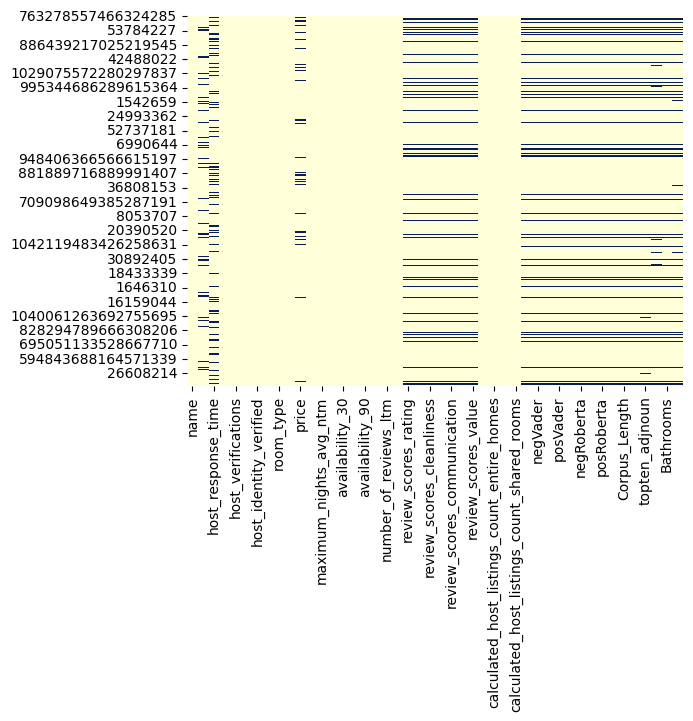



After dropping rows without reviews we have: 
name                                              0
host_location                                   481
host_response_time                              649
host_is_superhost                                 0
host_verifications                                0
host_has_profile_pic                              0
host_identity_verified                            0
neighbourhood_cleansed                            0
room_type                                         0
accommodates                                      0
price                                           267
minimum_nights_avg_ntm                            0
maximum_nights_avg_ntm                            0
has_availability                                  0
availability_30                                   0
availability_60                                   0
availability_90                                   0
availability_365                                  0
number_of_review

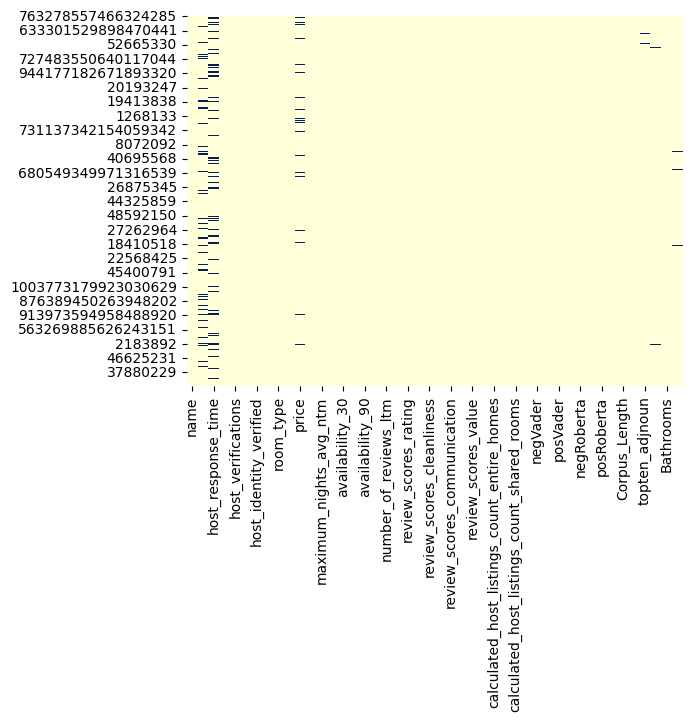

In [15]:
# check nulls
sns.heatmap(df_full.isnull(), cbar=False, cmap="YlGnBu")
plt.show()

# looks like many of the columns that were missing reviews, and therefore do not have sentiment 
# scoring, are missing many other cols as well. Let's drop those first and then work from there.

df_full = df_full.dropna(subset=['negVader', 'neutralVader', 'posVader',\
                                'sentimentVader', 'negRoberta', 'neutralRoberta',\
                                'posRoberta',])


# looks better but there are still some columns with many nans to deal with
print('\n\nAfter dropping rows without reviews we have: ')
print(df_full.isnull().sum())
sns.heatmap(df_full.isnull(), cbar=False, cmap="YlGnBu")
plt.show()

host_location
Portland, OR              3423
Vancouver, WA               34
San Francisco, CA           30
Eugene, OR                  27
United States               24
                          ... 
Philadelphia, PA             1
Orange, CA                   1
Detroit, MI                  1
London, United Kingdom       1
Newport, OR                  1
Name: count, Length: 134, dtype: int64


<Axes: xlabel='host_local', ylabel='count'>

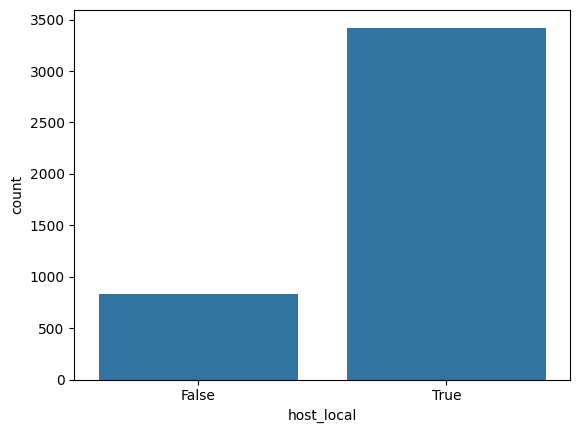

In [16]:
# the self reported host_location column contains a surprising amount of diversity.
print(df_full.host_location.value_counts())

# we can simplify this by building a new column called "self_reported_local"
# which is True if the host is located in "Portland, OR" and False otherwise.
# if no host location is reported, fill with False

df_full['host_local'] = df_full.host_location.apply(lambda x: x == 'Portland, OR')
df_full = df_full.drop('host_location', axis=1)

# how many hosts are local?
sns.countplot(x='host_local', data=df_full)

### Dealing with nans: Beds

In [17]:
import re
def get_beds(x):
    if pd.isnull(x.Beds):
        
        # assume a Studio only has one bed
        if 'Studio' in x['name']:
            beds = 1.0
        
        # assume a tiny home has only one bed
        elif 'Tiny home' in x['name']:
            beds = 1.0

        # else extract value from number of bedrooms
        else:
            beds = float(re.search('\d\sbedroom', x['name']).group().split(' ')[0])
        
        return beds
    else:
        return x.Beds
    
df_full['Beds'] = df_full.apply(get_beds, axis=1)

### Dealing with nans: Bathrooms

In [18]:
# listings missing a value for the number of bathrooms simply have the phrase 'half-bath' 
# rather than a float, so we can just fill these in with 0.5.

def get_baths(x):
    if pd.isnull(x.Bathrooms):
        # convert the phrase 'half-bath' into float
        if 'half-bath' in x['name']:
            baths = 0.5
        return baths
    else:
        return x.Bathrooms
    
df_full['Bathrooms'] = df_full.apply(get_baths, axis=1)


### Dealing with nans: Bedrooms

In [19]:
#print(df_full[df_full['Bedrooms'].isnull()].name)

# all other listings with no bedrooms were generally either tiny homes, houseboats, or a 'place to stay'
# after spot checking on a few of these links, judging from the pictures, in general it looks like
# these types of listings have only one bedroom

def get_bedrooms(x):
    if pd.isnull(x.Bedrooms):
        return 1.0
    else:
        return x.Bedrooms
    
df_full['Bedrooms'] = df_full.apply(get_bedrooms, axis=1)

### Imputing price from median by number of guests accommodated
For rows missing price data, fill in with the median price according to the number of guests accommodated.

In [20]:
df_price =  df_full.groupby(['accommodates', 'room_type']).price.median().reset_index()

def fill_price(x):
    if pd.isnull(x.price):
        acc = x.accommodates
        rmtype = x.room_type
        price = df_price.query(f'accommodates == {acc} and room_type == "{rmtype}"').price.item()
    else:
        price = x.price

    return price

df_full['price'] = df_full.apply(fill_price, axis=1)

# Building dummy cols for our categorical data
We have 5 categorical features:
- room_type
- property_type
- neighbourhood_cleansed
- response_time
- host_verifications, this one is a weird one; originally it was a list of up to 3 unique labels and rows would each have a combination of these labels.

## Literal eval for list type data entered as strings
Here we also split the list of strings into dummy columns

In [21]:
#print(df_full.host_verifications.unique())

# apply ast literal eval to build lists from strings
df_full['host_verifications'] = df_full.host_verifications.apply(ast.literal_eval)
df_full_dummies = df_full.copy()

# now just splitting the lists of data into dummy cols
# first get all unique labels. we end up with only three: phone, email and work email.
set_verifications = np.ravel(df_full.host_verifications.values)
set_verifications = set([x for arr in set_verifications for x in arr])

# function to build dummy tuple based on list of labels
def get_verifications(lst):
    phone, email, work_email = (False, False, False)
    if 'phone' in lst:
        phone = True
    
    if 'email' in lst:
        email = True

    if 'work_email' in lst:
        work_email = True

    return phone, email, work_email

# apply the function, build three new cols
df_full_dummies['host_verif_phone'], df_full_dummies['host_verif_email'], df_full_dummies['host_verif_work_email']\
 = zip(*df_full_dummies.host_verifications.apply(get_verifications))

# drop our old verifications col of lists
df_full_dummies = df_full_dummies.drop('host_verifications', axis=1)

df_full_dummies[['host_verif_phone', 'host_verif_email', 'host_verif_work_email']]

,host_verif_phone,host_verif_email,host_verif_work_email
763278557466324285,True,False,False
54342436,True,True,False
51554340,True,True,False
39727402,True,True,False
623976768455730606,True,True,False
...,...,...,...
51015713,True,False,False
855097881523473366,True,True,True
53108500,True,True,False
35907033,True,True,False


## Building dummy cols from our remaining categorical cols
All that's left of our categorical data is neighbourhood_cleansed, property_type and room_type

In [22]:
df_full_dummies['host_response_time'] = df_full_dummies.host_response_time.astype('category')
df_full_dummies = pd.get_dummies(prefix='response_t_', columns=['host_response_time'], data=df_full_dummies)
df_full_dummies = pd.get_dummies(columns=['neighbourhood_cleansed', 'room_type'], data=df_full_dummies)

for i, o in zip(df_full_dummies.dtypes.index, df_full_dummies.dtypes):
    print(f'{i: <60}: {str(o):^5}')

name                                                        : object
host_is_superhost                                           : bool 
host_has_profile_pic                                        : bool 
host_identity_verified                                      : bool 
accommodates                                                : int64
price                                                       : float64
minimum_nights_avg_ntm                                      : float64
maximum_nights_avg_ntm                                      : float64
has_availability                                            : bool 
availability_30                                             : int64
availability_60                                             : int64
availability_90                                             : int64
availability_365                                            : int64
number_of_reviews_ltm                                       : int64
number_of_reviews_l30d                   

In [23]:
# Check nulls once more
print(df_full_dummies.isnull().sum())

name                                0
host_is_superhost                   0
host_has_profile_pic                0
host_identity_verified              0
accommodates                        0
                                   ..
neighbourhood_cleansed_Woodstock    0
room_type_Entire home/apt           0
room_type_Hotel room                0
room_type_Private room              0
room_type_Shared room               0
Length: 145, dtype: int64


# Some EDA

<Axes: >

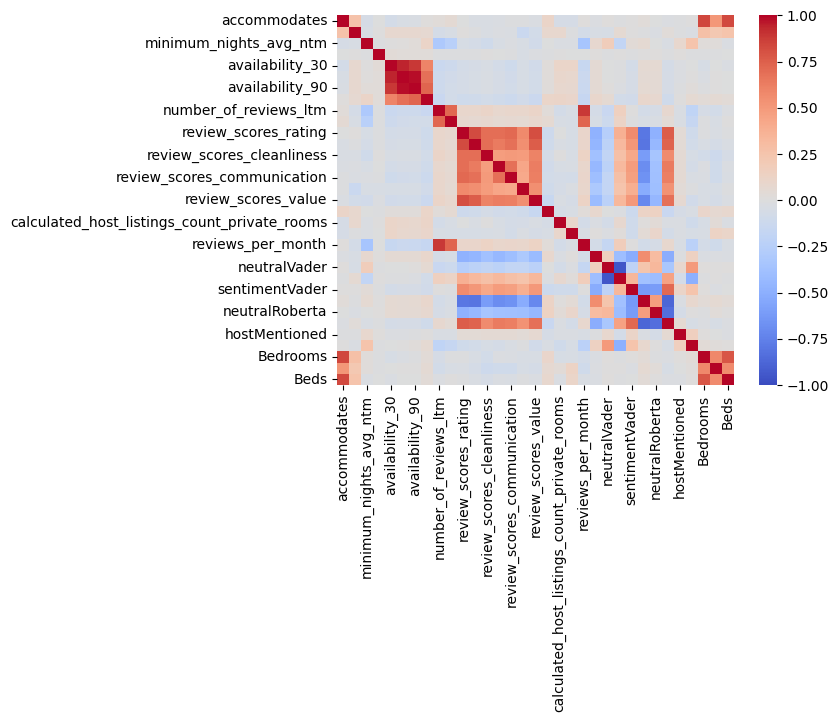

In [24]:
df_full_dummies = df_full_dummies.drop('name', axis=1)
sns.heatmap(df_full_dummies.select_dtypes('number').corr(), vmin=-1, vmax=1, cmap='coolwarm')

# Do Roberta and Vader agree?
In general yes, but Roberta seems to have a bit more spread in the positive and negative categories. Roberta tends to rate reviews as leaning more positive, while Vader rates reviews as having more neutral content.

Note that scores for Roberta are given as a proportion from 0 to 1 of the total score; that is the sum of all Roberta scores is equal to 1 for a given row. This means we can interpret it as the percent of sentiment that was either positive/negative/neutral. Vader scores lie on a scale from -1 to 1 where -1 is the most negative sentiment and +1 is the most positive sentiment. Vader scores are summed and a final composite Vader score can be reported as the "overall" sentiment. 

,posRoberta,negRoberta,neutralRoberta,posVader,negVader,neutralVader
count,4256.000000,4256.000000,4256.000000,4256.000000,4256.000000,4256.000000
mean,0.944770,0.016191,0.039039,0.452189,0.013782,0.533271
std,0.077127,0.047602,0.041931,0.065168,0.017100,0.060524
min,0.004055,0.000908,0.004835,0.000000,0.000000,0.000000
25%,0.939381,0.002288,0.019010,0.432383,0.007390,0.508539
50%,0.963941,0.005251,0.029308,0.457946,0.011136,0.529274
75%,0.978061,0.013684,0.044992,0.479000,0.015822,0.552522
max,0.993334,0.946536,0.736800,1.000000,0.481000,1.000000


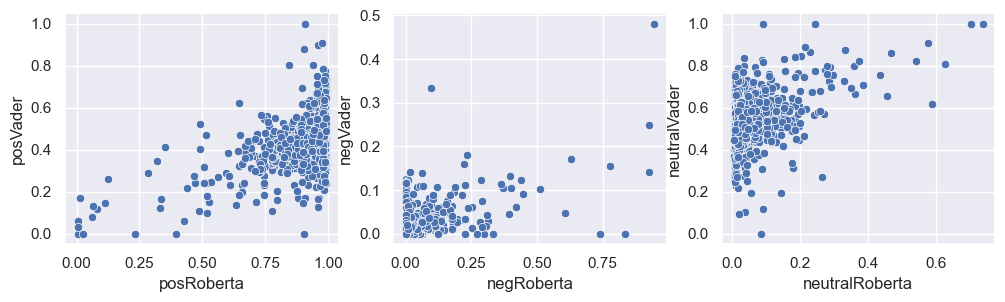

In [25]:
sns.set_theme()

f, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,3))
sns.scatterplot(x='posRoberta', y='posVader', data=df_full_dummies, ax=axs[0])
sns.scatterplot(x='negRoberta', y='negVader', data=df_full_dummies, ax=axs[1])
sns.scatterplot(x='neutralRoberta', y='neutralVader', data=df_full_dummies, ax=axs[2])

# some descriptive statistics
pd.concat([pd.DataFrame(df_full_dummies.posRoberta.describe()), pd.DataFrame(df_full_dummies.negRoberta.describe()),\
           pd.DataFrame(df_full_dummies.neutralRoberta.describe()), pd.DataFrame(df_full_dummies.posVader.describe()),\
           pd.DataFrame(df_full_dummies.negVader.describe()), pd.DataFrame(df_full_dummies.neutralVader.describe())], axis=1)

# Are reviews more positive/negative in local vs non-local hosts?
it looks like local hosts tend to have less negative sentiment and more slightly more positive sentiment than non local hosts.

Local vs Non-Local Host, NegRoberta t-test: 
t=-5.362172119057826, p=1.0436932283895061e-07

Local vs Non-Local Host, PosRoberta t-test: 
t=6.309779794870318, p=4.240077644500055e-10


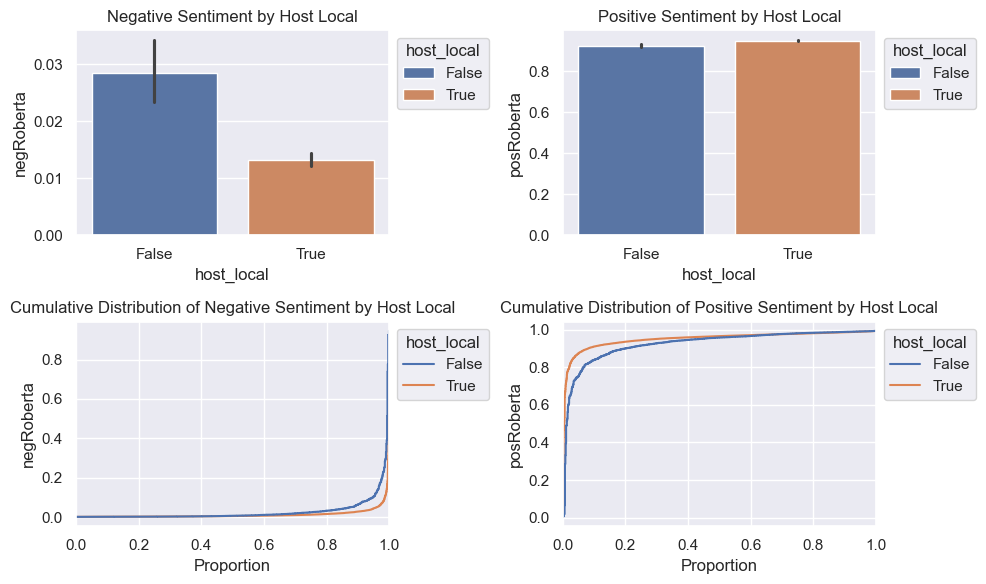

In [26]:
#f, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
f, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,6))
axs = np.ravel(axs)
g = sns.barplot(x='host_local', y='negRoberta', data=df_full, hue='host_local', ax=axs[0])
axs[0].set_title('Negative Sentiment by Host Local')
g1 =sns.barplot(x='host_local', y='posRoberta', data=df_full, hue='host_local', ax=axs[1])
axs[1].set_title('Positive Sentiment by Host Local')
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(g1, "upper left", bbox_to_anchor=(1, 1))


g2 = sns.ecdfplot(data=df_full, y='negRoberta', hue='host_local', ax=axs[2])
axs[2].set_title('Cumulative Distribution of Negative Sentiment by Host Local')
g3 = sns.ecdfplot(data=df_full, y='posRoberta', hue='host_local', ax=axs[3])
axs[3].set_title('Cumulative Distribution of Positive Sentiment by Host Local')
sns.move_legend(g2, "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(g3, "upper left", bbox_to_anchor=(1, 1))

plt.tight_layout()

from scipy.stats import ttest_ind
a = df_full.query('host_local == True').negRoberta.values
b = df_full.query('host_local == False').negRoberta.values
t, p = ttest_ind(a, b, equal_var=False)
print(f'Local vs Non-Local Host, NegRoberta t-test: \nt={t}, p={p}')

a = df_full.query('host_local == True').posRoberta.values
b = df_full.query('host_local == False').posRoberta.values
t, p = ttest_ind(a, b, equal_var=False)
print(f'\nLocal vs Non-Local Host, PosRoberta t-test: \nt={t}, p={p}')


# Are reviews more positive/negative in superhosts vs non superhosts?
it looks like superhosts tend to have less negative sentiment and more slightly more positive sentiment than non local hosts.

Superhost vs Non-Superhost, NegRoberta t-test: 
t=-7.365533149088008, p=2.4746909467205767e-13

Superhost vs Non-Superhost, PosRoberta t-test: 
t=9.058898812870744, p=2.8062954603466377e-19


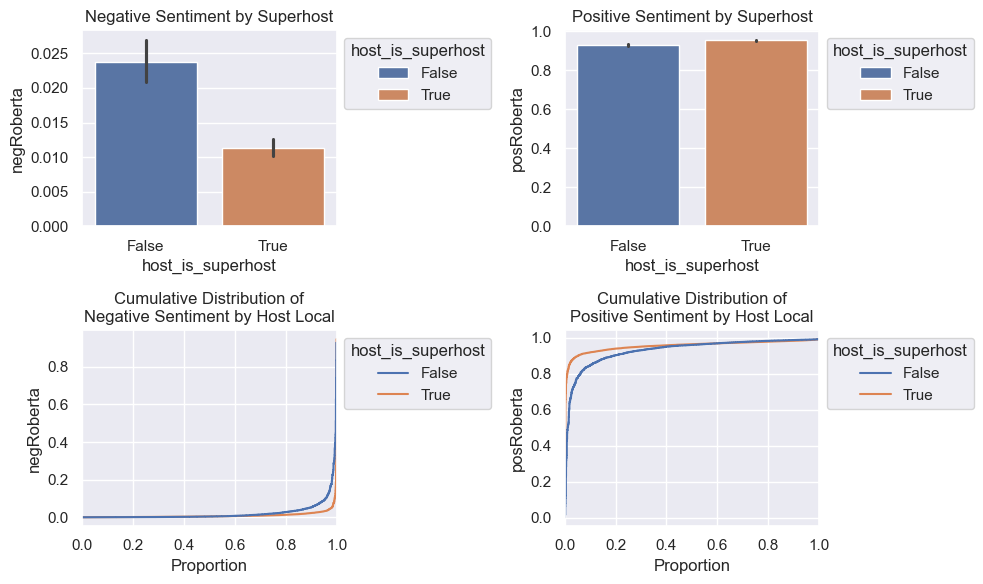

In [27]:
f, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,6))
axs = np.ravel(axs)
g = sns.barplot(x='host_is_superhost', y='negRoberta', data=df_full, hue='host_is_superhost', ax=axs[0])
axs[0].set_title('Negative Sentiment by Superhost')
g1 =sns.barplot(x='host_is_superhost', y='posRoberta', data=df_full, hue='host_is_superhost', ax=axs[1])
axs[1].set_title('Positive Sentiment by Superhost')
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(g1, "upper left", bbox_to_anchor=(1, 1))


g2 = sns.ecdfplot(data=df_full, y='negRoberta', hue='host_is_superhost', ax=axs[2])
axs[2].set_title('Cumulative Distribution of\nNegative Sentiment by Host Local')
g3 = sns.ecdfplot(data=df_full, y='posRoberta', hue='host_is_superhost', ax=axs[3])
axs[3].set_title('Cumulative Distribution of\nPositive Sentiment by Host Local')
sns.move_legend(g2, "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(g3, "upper left", bbox_to_anchor=(1, 1))

plt.tight_layout()

from scipy.stats import ttest_ind
a = df_full.query('host_is_superhost == True').negRoberta.values
b = df_full.query('host_is_superhost == False').negRoberta.values
t, p = ttest_ind(a, b, equal_var=False)
print(f'Superhost vs Non-Superhost, NegRoberta t-test: \nt={t}, p={p}')

a = df_full.query('host_is_superhost == True').posRoberta.values
b = df_full.query('host_is_superhost == False').posRoberta.values
t, p = ttest_ind(a, b, equal_var=False)
print(f'\nSuperhost vs Non-Superhost, PosRoberta t-test: \nt={t}, p={p}')

# Sentiment vs Corpus Length

,slope,intercept,r_value,p_value,std_err
0,0.000323,0.006809,0.080029,1.715292e-07,0.000062
1,-0.000331,0.954389,-0.050640,9.504348e-04,0.000100


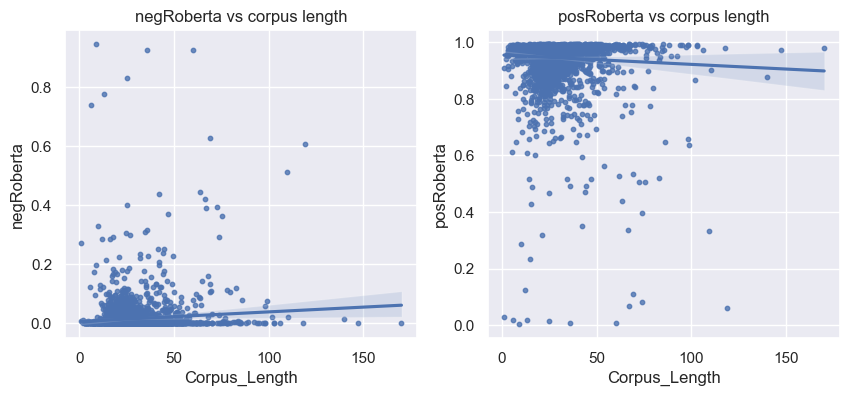

In [29]:
f, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
g = sns.regplot(x='Corpus_Length', y='negRoberta', data=df_full, scatter_kws={'s':10}, ax=axs[0])
axs[0].set_title('negRoberta vs corpus length')
g = sns.regplot(x='Corpus_Length', y='posRoberta', data=df_full, scatter_kws={'s':10}, ax=axs[1])
axs[1].set_title('posRoberta vs corpus length')


rows = []
for y in ['negRoberta', 'posRoberta']:
    slope, intercept, r_value, p_value, std_err = linregress(df_full['Corpus_Length'], df_full[y])

    row = dict(zip(['slope', 'intercept', 'r_value', 'p_value', 'std_err'], \
                [slope, intercept, r_value, p_value, std_err]
                ))
    rows.append(row)
lr_summary = pd.DataFrame(rows)
lr_summary

# Roberta Sentiment by Neighborhood
These bar plots are a bit hard to read. In general most neighborhoods are well recieved but some things do stand out:
- those with low postive sentiment show a spike in negative sentiment; however the large error bars might suggest small ns. It may be the case that these neighborhoods are too geographically specific (not enough listings in a small area). It might be worth classiffying them in to more general areas. Many people simply refer to groups of these neighborhoods as NW, SW, NE or SE. 
- notably the following:
    - Sylvan Highlands
    - Collins View
    - Northwest Heights
    - Homestead
    - Old Town/Chinatown
    - Argay
    - East Columbia
    - Hazelwood

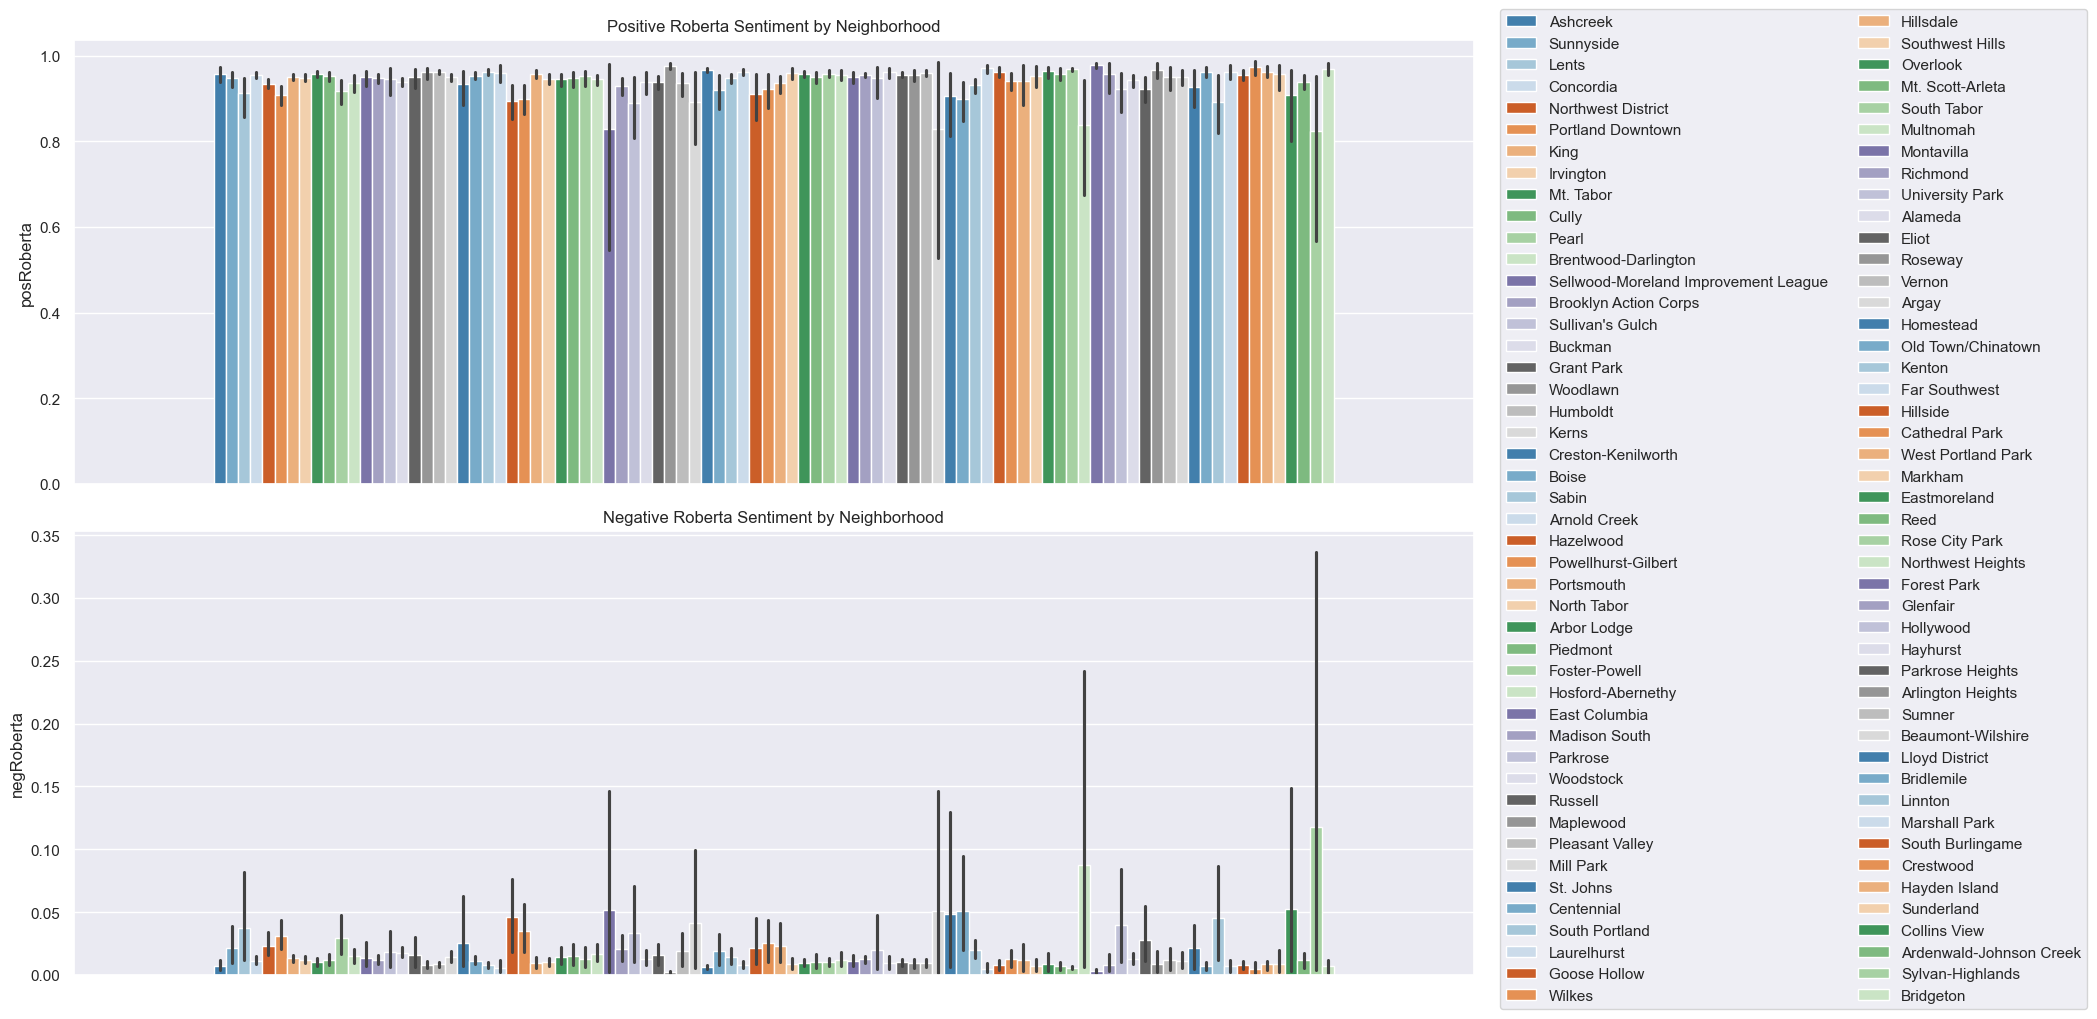

In [30]:
f, axs = plt.subplots(nrows=2, ncols=1, figsize=(15,10))
g = sns.barplot(y='posRoberta', data=df_full, hue='neighbourhood_cleansed', ax=axs[0], palette='tab20c')
g.get_legend().remove()
axs[0].set_title('Positive Roberta Sentiment by Neighborhood')
f.legend(ncol=2, loc='upper left', bbox_to_anchor=(1,1))

g1 = sns.barplot(y='negRoberta', data=df_full, hue='neighbourhood_cleansed', ax=axs[1], legend=False, palette='tab20c')
axs[1].set_title('Negative Roberta Sentiment by Neighborhood')
plt.tight_layout()

# Simplifying Neighborhoods
The barchart above is difficult to read. In general people compartmentalize Portland into sex major sextants: NW, N, NE, SE, S and SW. I found a table on Wikipedia that contains this information for each neighborood. Here I'm using this table to reduce the neighborhood labels down to sextants.

posRoberta by sextant, 1way ANOVA:
 F_onewayResult(statistic=7.878864348766314, pvalue=2.1379427355201574e-07)

negRoberta by sextant, 1way ANOVA:
 F_onewayResult(statistic=7.089694860293756, pvalue=1.302469756853209e-06)


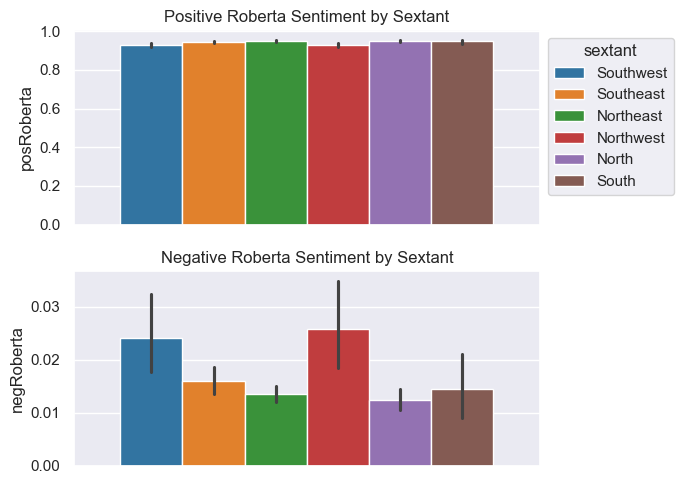

In [31]:
# this csv was scraped from wikipedia
df_sextants = pd.read_csv('Neighborhoods_of_Portland,_Oregon_1.csv')
set(df_full.neighbourhood_cleansed.unique()) - set(df_sextants['Neighborhood name'].unique())

# renaming some names that don't completely match our new csv from wikipedia
rename_neighborhood = {
    'Brooklyn Action Corps': 'Brooklyn', 
    'Mt. Tabor': 'Mount Tabor',
    'Multnomah': 'Multnomah/Multnomah Village',
    'Old Town/Chinatown': 'Old Town',
    'Pearl' : 'Pearl District',
    'Portland Downtown': 'Downtown',
    'Sellwood-Moreland Improvement League': 'Sellwood-Moreland (Westmoreland)'
    }
df_full['neighborhood_rename'] = df_full.neighbourhood_cleansed.replace(rename_neighborhood)

# building sextant col
sextants = [sxt.split(',')[0] if ',' in sxt else sxt for sxt in df_sextants['Sextant'].values ]
df_full['sextant'] = df_full.neighborhood_rename.replace(dict(zip(df_sextants['Neighborhood name'], sextants)))

# plot
f, axs = plt.subplots(nrows=2, ncols=1, figsize=(7,5))
g = sns.barplot(y='posRoberta', data=df_full, hue='sextant', ax=axs[0], palette='tab10')
axs[0].set_title('Positive Roberta Sentiment by Sextant')
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))

g1 = sns.barplot(y='negRoberta', data=df_full, hue='sextant', ax=axs[1], legend=False, palette='tab10')
axs[1].set_title('Negative Roberta Sentiment by Sextant')
plt.tight_layout()

# ANOVA
sextant_pos = [df_full.query(f'sextant == "{sxt}"').posRoberta for sxt in df_full.sextant.unique()]
sextant_neg = [df_full.query(f'sextant == "{sxt}"').negRoberta for sxt in df_full.sextant.unique()]

print('posRoberta by sextant, 1way ANOVA:\n',f_oneway(*sextant_pos))
print('\nnegRoberta by sextant, 1way ANOVA:\n',f_oneway(*sextant_neg))

In [33]:
# quickly updating my dummy cols, since I've reduced the neighborhood col down, I need to 
# drop my old dummy cols and build new ones on the sextants
df_full_dummies_sxt = df_full_dummies[[col for col in df_full_dummies.columns if not 'neighbourhood_cleansed' in col ]].copy()
df_full_dummies_sxt['sextant'] = df_full['sextant']
df_full_dummies_sxt = pd.get_dummies(data=df_full_dummies_sxt, columns=['sextant'])

df_full_dummies_sxt.columns

Index(['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
       'accommodates', 'price', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'negVader', 'neutralVader', 'posVader', 'sentimentVader', 'negRoberta',
       'neutralRoberta', 'posRoberta', 'hostMentioned', 'Corpus_Length',
       'topten_tokens', 'topten_adjnoun', 'Bedrooms', 'Bathrooms', 'Beds',
       'host_local', 'host

# Some quick distributions of our targets

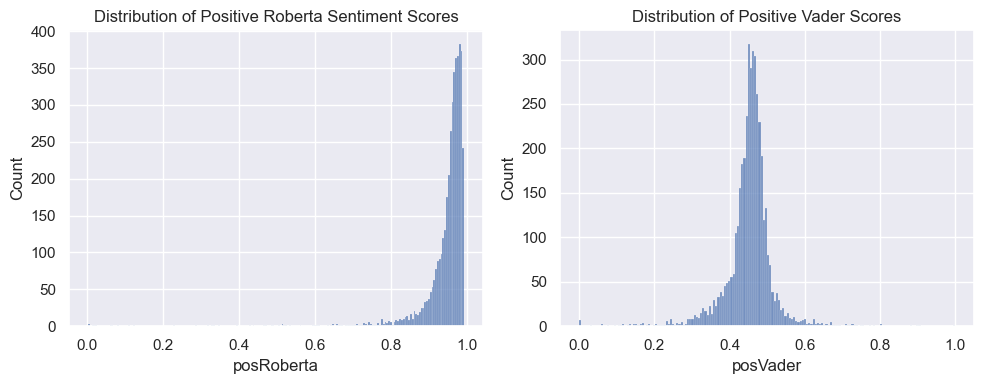

In [37]:
f, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
g0 = sns.histplot(df_full_dummies_sxt.posRoberta, ax=axs[0])
g0.set_title('Distribution of Positive Roberta Sentiment Scores')
g1 = sns.histplot(df_full_dummies_sxt.posVader, ax=axs[1])
g1.set_title('Distribution of Positive Vader Scores')
plt.tight_layout()

# Common tokens in the top quintile of reviews
for now I will take posRoberta as my target value. 

A bit generic but we can get a sense that listings that are clean, conveniently located in a walkable neighborhood with shops, restaurants and public transportation nearby are rated highly. It looks like having an excellent host may also be an important factor for highly positive reviews.

In [111]:
df_full_dummies['qtile'] = pd.qcut(df_full_dummies.posRoberta, 5, labels=['excellent', 'very_good', 'good', 'fair', 'poor'])

df_top_qtile_tokens = df_full_dummies.query('qtile == "excellent"')[['topten_tokens', 'topten_adjnoun']]
#'hostMentioned', 'Corpus_Length','reviews_per_month']]

t, c = np.unique([x for arr in df_top_qtile_tokens.topten_tokens.apply(np.ravel).values for x in arr], return_counts=True)
df_topqtile_token = pd.DataFrame({'top_qtile_token':t, 'count':c}).sort_values(by='count', ascending=False)[:20].reset_index()

t, c = np.unique([x for arr in df_top_qtile_tokens.dropna().topten_adjnoun.apply(np.ravel).values for x in arr], return_counts=True)
df_topqtile_adjnoun = pd.DataFrame({'top_qtile_adjnoun':t, 'count':c}).sort_values(by='count', ascending=False)[:20].reset_index()

df_topqtile_tokens = pd.concat([df_topqtile_token, df_topqtile_adjnoun], axis=1)
df_topqtile_tokens


,index,top_qtile_token,count,index,top_qtile_adjnoun,count
0,318,good,754,876,great place,463
1,821,stay,721,868,great location,334
2,640,place,691,892,great stay,274
3,457,location,437,856,great host,217
4,153,clean,408,1730,nice place,192
5,966,would,332,800,good location,122
6,351,host,289,1621,next time,107
7,324,great,276,2588,quiet neighborhood,101
8,164,comfortable,272,883,great restaurants,81
9,654,portland,265,899,great time,75


## Compare with top qtile tokens from positive Vader sentiment
Generally very similar to the Roberta results, this time we also see "downtown Portland" appearing so proximity to commercial areas/points of interest may also be important. In general location seems to be very important.

In [112]:
df_full_dummies['qtile'] = pd.qcut(df_full_dummies.posVader, 5, labels=['excellent', 'very_good', 'good', 'fair', 'poor'])

df_top_qtile_tokens = df_full_dummies.query('qtile == "excellent"')[['topten_tokens', 'topten_adjnoun']]

t, c = np.unique([x for arr in df_top_qtile_tokens.topten_tokens.apply(np.ravel).values for x in arr], return_counts=True)
df_topqtile_token = pd.DataFrame({'top_qtile_token':t, 'count':c}).sort_values(by='count', ascending=False)[:20].reset_index()

t, c = np.unique([x for arr in df_top_qtile_tokens.dropna().topten_adjnoun.apply(np.ravel).values for x in arr], return_counts=True)
df_topqtile_adjnoun = pd.DataFrame({'top_qtile_adjnoun':t, 'count':c}).sort_values(by='count', ascending=False)[:20].reset_index()

df_topqtile_tokens = pd.concat([df_topqtile_token, df_topqtile_adjnoun], axis=1)
df_topqtile_tokens

,index,top_qtile_token,count,index,top_qtile_adjnoun,count
0,367,good,665,1033,great place,253
1,1071,stay,635,1022,great location,196
2,810,place,579,1011,great host,152
3,827,portland,342,1050,great stay,135
4,560,location,271,1877,next time,95
5,407,host,250,2893,quiet neighborhood,79
6,412,house,221,1058,great time,71
7,401,home,207,1040,great restaurants,65
8,1263,would,198,1431,long term,63
9,190,comfortable,176,2573,perfect place,60


In [113]:
# #'hostMentioned', 'Corpus_Length','reviews_per_month']]
# sns.boxplot(x='qtile', y='hostMentioned', data=df_full_dummies)

# Let's build some models
Our sentiment scores are numeric so this is a regression problem. We could turn this problem into a binary classification if we wanted to split rows on the median of our target col and label them as above vs below median (we want roughly equal counts of the positive and negative class). For now I will take posRoberta as target values. 

In [114]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance


## Slice out X, y
Here I'm taking posRoberta as our targets.

In [115]:
df_data = df_full_dummies.drop(['topten_tokens', 'topten_adjnoun', 'qtile'], axis=1)

# slice out targets
df_ys = df_data[['negVader','neutralVader', 'posVader', 'sentimentVader', 'negRoberta', 'neutralRoberta', 'posRoberta']].copy()

# remove targets from X set
X = df_data.drop(['negVader','neutralVader', 'posVader', 'sentimentVader', 'negRoberta', 'neutralRoberta', 'posRoberta'], axis=1).copy()

# taking posRoberta as y
y = df_ys.posRoberta

## Standard Scaler

In [116]:
# instantiate scaler
scaler = StandardScaler()

# we want to scale numeric features
df_numeric = X.select_dtypes('number')

# fit, transform
scaler.fit(df_numeric)
scaled_features = scaler.transform(df_numeric)

# toss into dataframe
df_scaled = pd.DataFrame(scaled_features, index=df_numeric.index, columns=df_numeric.columns)

# replace with scaled data
X[df_scaled.columns] = df_scaled[df_scaled.columns]

# let's take a look
X

,host_is_superhost,host_has_profile_pic,host_identity_verified,accommodates,price,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,...,neighbourhood_cleansed_University Park,neighbourhood_cleansed_Vernon,neighbourhood_cleansed_West Portland Park,neighbourhood_cleansed_Wilkes,neighbourhood_cleansed_Woodlawn,neighbourhood_cleansed_Woodstock,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
763278557466324285,False,True,True,-0.745733,-0.087767,-0.476290,-0.021691,True,-1.096868,-1.227487,...,False,False,False,False,False,False,True,False,False,False
54342436,True,True,True,0.668214,0.087597,-0.409317,-0.021691,False,-1.096868,-1.227487,...,False,False,False,False,False,False,True,False,False,False
51554340,False,True,True,-0.745733,-0.263131,-0.275370,-0.021675,True,0.034370,-0.139525,...,False,False,False,False,False,False,True,False,False,False
39727402,False,True,False,-0.745733,-0.413443,1.532912,-0.021675,True,-1.096868,-1.227487,...,False,False,False,False,False,False,False,False,True,False
623976768455730606,True,True,True,-0.745733,-0.348308,-0.409317,-0.021675,True,-1.096868,-1.227487,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51015713,True,True,True,2.553477,0.814106,1.465939,-0.021675,True,-0.052649,0.529990,...,False,False,False,False,False,False,True,False,False,False
855097881523473366,False,True,True,0.196898,0.097618,1.465939,-0.021697,True,0.121388,-0.641661,...,False,False,False,False,False,False,True,False,False,False
53108500,True,True,True,1.139530,-0.037663,-0.442803,-0.021675,True,-1.096868,-1.227487,...,False,False,False,False,False,False,True,False,False,False
35907033,True,True,True,0.196898,-0.318245,-0.476290,-0.021675,True,-1.096868,-1.227487,...,False,False,False,False,False,False,True,False,False,False


In [117]:
# split data into training/test sets with 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12345, test_size=0.20, shuffle=True)

# instantiate linear regressor
lr = LinearRegression()
# cross validate, score with neg mse and r2
cv_scores_mse = cross_val_score(estimator=lr, X=X_train, y=y_train, scoring='neg_mean_squared_error', cv=5)
cv_scores_r2 = cross_val_score(estimator=lr, X=X_train, y=y_train, scoring='r2', cv=5)

# compute rmse
rmse_lr = np.sqrt(-cv_scores_mse)

# toss into dataframe
df_training = pd.DataFrame({
    'regressor': [str(lr)],
    'mean_neg_mse': [np.mean(cv_scores_mse)],
    'mean_r2': [np.mean(cv_scores_r2)],
    'mean_rmse': [np.mean(rmse_lr)]
})
df_training

,regressor,mean_neg_mse,mean_r2,mean_rmse
0,LinearRegression(),-2.309316e+14,-4.427013e+16,6.796052e+06


In [118]:
# instantiate models 
dt = DecisionTreeRegressor(random_state=12345)
rf = RandomForestRegressor(n_estimators=500, random_state=12345)
lasso = Lasso(alpha=0.1)
elasticnet = ElasticNet()
ridge = Ridge(alpha=0.5)
bagging = BaggingRegressor(random_state=12345)
gbr = GradientBoostingRegressor(n_estimators=500, random_state=12345)
regressors = [dt, rf, lasso, elasticnet, ridge, bagging, gbr]

for reg in regressors:

    # cross validate, score with neg mse and r2
    cv_scores_mse = cross_val_score(estimator=reg, X=X_train, y=np.array(y_train),scoring='neg_mean_squared_error', cv=5)
    cv_scores_r2 = cross_val_score(estimator=reg, X=X_train, y=np.array(y_train), scoring='r2', cv=5)

    # compute rmse
    rmse = np.sqrt(-cv_scores_mse)

    df_reg_eval = pd.DataFrame({
        'regressor': [str(reg)],
        'mean_neg_mse': [np.mean(cv_scores_mse)],
        'mean_r2': [np.mean(cv_scores_r2)],
        'mean_rmse': [np.mean(rmse)]
    })

    df_training = pd.concat([df_training, df_reg_eval], ignore_index=True) 
    
df_training.sort_values(by='mean_rmse', ascending=True)

,regressor,mean_neg_mse,mean_r2,mean_rmse
2,"RandomForestRegressor(n_estimators=500, random...",-2.141629e-03,6.487158e-01,4.570035e-02
5,Ridge(alpha=0.5),-2.211467e-03,6.368920e-01,4.646867e-02
6,BaggingRegressor(random_state=12345),-2.317647e-03,6.188990e-01,4.771635e-02
7,"GradientBoostingRegressor(n_estimators=500, ra...",-2.531092e-03,5.811665e-01,4.964714e-02
1,DecisionTreeRegressor(random_state=12345),-3.679381e-03,3.770450e-01,6.036609e-02
3,Lasso(alpha=0.1),-6.093534e-03,-1.574440e-03,7.783577e-02
4,ElasticNet(),-6.093534e-03,-1.574440e-03,7.783577e-02
0,LinearRegression(),-2.309316e+14,-4.427013e+16,6.796052e+06


# Tuning with random search CV

In [119]:
param_search = {
    'bootstrap': [True, False],
    'max_depth': np.linspace(10, 110, 11).astype(int),
    'max_features': [1.0, 'sqrt'], # note the change in version 1.1 from "auto" to 1.0 
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'n_estimators': np.linspace(200, 2000, 10).astype(int)
}
# instantiate model (the same random forest as before)
rf = RandomForestRegressor(random_state=12345)

# random search cv with our param search space
randomsearch = RandomizedSearchCV(rf, param_distributions=param_search,\
                                  n_iter=20, cv=3, verbose=1, random_state=12345,\
                                  n_jobs=-1, scoring="neg_mean_squared_error") 

# fit the random search model
randomsearch.fit(X_train, y_train)

# let's take a look
best_params = randomsearch.best_params_ 
best_estimator = randomsearch.best_estimator_ 
best_score = randomsearch.best_score_

print(best_params)
print(best_estimator)
print(best_score)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


{'n_estimators': 1400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 1.0, 'max_depth': 40, 'bootstrap': True}
RandomForestRegressor(max_depth=40, n_estimators=1400, random_state=12345)
-0.0021502201198868296


# Evaluate the random forest found by random search CV

In [120]:
randomsearch_cv_mse = cross_val_score(estimator=best_estimator, X=X_train, y=np.array(y_train), scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
randomsearch_cv_r2 = cross_val_score(estimator=best_estimator, X=X_train, y=np.array(y_train), scoring='r2', cv=5, n_jobs=-1)

# compute rmse
rmse = np.sqrt(-randomsearch_cv_mse)

mean_neg_mse = np.mean(randomsearch_cv_mse) 
mean_r2 = np.mean(randomsearch_cv_r2) 
mean_rmse = np.mean(rmse)

print(f'random search mean cv mse: {mean_neg_mse}')
print(f'random search mean cv r2: {mean_r2}')
print(f'random search mean cv rmse: {mean_rmse}')

random search mean cv mse: -0.0021340054470947987
random search mean cv r2: 0.650016663919617
random search mean cv rmse: 0.04563084651596054


# Final evaluation on test data

In [121]:
# fitting to test
y_test_preds = best_estimator.predict(X_test)

# the final evaluation
test_mse = mean_squared_error(y_test, y_test_preds)
test_r2 = r2_score(y_test, y_test_preds)
test_rmse = np.sqrt(test_mse)

# print out results
print('random search final evaluation:')
print(f'test set mse: {test_mse}')
print(f'test set r2: {test_r2}')
print(f'test set rmse: {test_rmse}')

random search final evaluation:
test set mse: 0.003553331487943226
test set r2: 0.3390599661411131
test set rmse: 0.059609827108818444


# Investigating Model Feature Importances
One of the features users base their decisions on is the reviews of other users. The high importance of the review_scores features indicates that in general users tend to value the opinion of other's reviews highly. Specifically, accuracy (how well does the unit actually match its listing?), review length (were other users' reviews informative, thorough?), value and location were important. Good communication with hosts also seems to play an important role. Our previous EDA suggests that hosts who are local and accessible have a slight edge in positive sentiment content compared to hosts who are not local and not accessible.

In [122]:
df_importances = pd.DataFrame({
    'feature': best_estimator.feature_names_in_,
    'importance': best_estimator.feature_importances_
})

df_importances.sort_values(by='importance', ascending=False)[:20]

,feature,importance
15,review_scores_accuracy,0.386356
14,review_scores_rating,0.269160
27,Corpus_Length,0.066015
20,review_scores_value,0.043656
19,review_scores_location,0.024202
18,review_scores_communication,0.021299
4,price,0.015443
25,reviews_per_month,0.014917
16,review_scores_cleanliness,0.012190
17,review_scores_checkin,0.011412


# Permutation feature importance

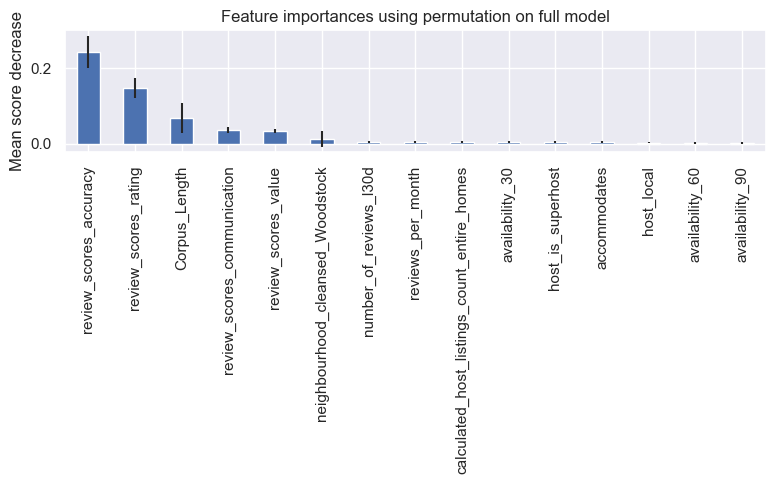

,importances_mean,importances_std
review_scores_accuracy,0.242318,0.042977
review_scores_rating,0.148312,0.026963
Corpus_Length,0.067979,0.039449
review_scores_communication,0.036875,0.007635
review_scores_value,0.032636,0.005579
neighbourhood_cleansed_Woodstock,0.012573,0.021034
number_of_reviews_l30d,0.005181,0.003061
reviews_per_month,0.004287,0.002509
calculated_host_listings_count_entire_homes,0.003999,0.002182
availability_30,0.003410,0.002509


In [43]:
result = permutation_importance(
    best_estimator, X_test, y_test, n_repeats=100, random_state=12345, n_jobs=-1
)

feature_names = X.columns
forest_importances = pd.DataFrame({'importances_mean':result.importances_mean,'importances_std': result.importances_std}, index=feature_names)\
    .sort_values(by='importances_mean', ascending=False)[:15]
fig, ax = plt.subplots(figsize=(8,5))

forest_importances.importances_mean.plot.bar(yerr=forest_importances.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean score decrease")
fig.tight_layout()
plt.show()
forest_importances

# Retraining without review_scores cols
The logic that the sentiment of a review can be predicted based off of the scores of other reviews seems a bit circular. Let's try again with out these cols.
That is not to say however that we cannot make useful insights from the previous model. The listings data set does not capture some of the features that are described in the reviews score section; and because prospective guests can indeed view these scores, as well as the text of other guests' reviews, it may be the case that prospective guests really do take these in to serious consideration when booking a stay with Airbnb. If it is the case then that most guests' reviews do reflect the reality of some shared positive quality across stays, then it is logical that many guests would report similar experiences (and so the sentiment will be well correlated with how guests score the listing on these various metrics: rating, accuracy, cleanliness, communication, location, value).

In [44]:
# split data into training/test sets with 80/20 split
to_drop = [col for col in X.columns if 'review_score' in col]
X_drop_scores = X.drop(to_drop, axis=1).copy()

X_train, X_test, y_train, y_test = train_test_split(X_drop_scores, y, random_state=12345, test_size=0.20, shuffle=True)

# instantiate linear regressor
lr = LinearRegression()
# cross validate, score with neg mse and r2
cv_scores_mse = cross_val_score(estimator=lr, X=X_train, y=y_train, scoring='neg_mean_squared_error', cv=5)
cv_scores_r2 = cross_val_score(estimator=lr, X=X_train, y=y_train, scoring='r2', cv=5)

# compute rmse
rmse_lr = np.sqrt(-cv_scores_mse)

# toss into dataframe
df_training = pd.DataFrame({
    'regressor': [str(lr)],
    'mean_neg_mse': [np.mean(cv_scores_mse)],
    'mean_r2': [np.mean(cv_scores_r2)],
    'mean_rmse': [np.mean(rmse_lr)]
})
df_training

,regressor,mean_neg_mse,mean_r2,mean_rmse
0,LinearRegression(),-5.444438e+14,-1.043712e+17,1.043498e+07


In [45]:
# instantiate models 
dt = DecisionTreeRegressor(random_state=12345)
rf = RandomForestRegressor(n_estimators=200, random_state=12345)
lasso = Lasso(alpha=0.1)
elasticnet = ElasticNet()
ridge = Ridge(alpha=0.5)
bagging = BaggingRegressor(random_state=12345)
gbr = GradientBoostingRegressor(n_estimators=200, random_state=12345)
regressors = [dt, rf, lasso, elasticnet, ridge, bagging, gbr]

for reg in regressors:

    # cross validate, score with neg mse and r2
    cv_scores_mse = cross_val_score(estimator=reg, X=X_train, y=np.array(y_train),scoring='neg_mean_squared_error', cv=5)
    cv_scores_r2 = cross_val_score(estimator=reg, X=X_train, y=np.array(y_train), scoring='r2', cv=5)

    # compute rmse
    rmse = np.sqrt(-cv_scores_mse)

    df_reg_eval = pd.DataFrame({
        'regressor': [str(reg)],
        'mean_neg_mse': [np.mean(cv_scores_mse)],
        'mean_r2': [np.mean(cv_scores_r2)],
        'mean_rmse': [np.mean(rmse)]
    })

    df_training = pd.concat([df_training, df_reg_eval], ignore_index=True) 
    
df_training.sort_values(by='mean_rmse', ascending=True)

,regressor,mean_neg_mse,mean_r2,mean_rmse
5,Ridge(alpha=0.5),-5.941747e-03,1.869918e-02,7.693572e-02
2,"RandomForestRegressor(n_estimators=200, random...",-6.027297e-03,1.149794e-03,7.754098e-02
3,Lasso(alpha=0.1),-6.093534e-03,-1.574440e-03,7.783577e-02
4,ElasticNet(),-6.093534e-03,-1.574440e-03,7.783577e-02
6,BaggingRegressor(random_state=12345),-6.486471e-03,-7.548771e-02,8.043567e-02
7,"GradientBoostingRegressor(n_estimators=200, ra...",-6.549129e-03,-9.329248e-02,8.085902e-02
1,DecisionTreeRegressor(random_state=12345),-1.025695e-02,-7.593072e-01,1.002127e-01
0,LinearRegression(),-5.444438e+14,-1.043712e+17,1.043498e+07


In [46]:
param_search = {
    'bootstrap': [True, False],
    'max_depth': np.linspace(10, 110, 11).astype(int),
    'max_features': [1.0, 'sqrt'], # note the change in version 1.1 from "auto" to 1.0 
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'n_estimators': np.linspace(200, 2000, 10).astype(int)
}
# instantiate model (the same random forest as before)
rf = RandomForestRegressor(random_state=12345)

# random search cv with our param search space
randomsearch = RandomizedSearchCV(rf, param_distributions=param_search,\
                                  n_iter=20, cv=3, verbose=1, random_state=12345,\
                                  n_jobs=-1, scoring="neg_mean_squared_error") 

# fit the random search model
randomsearch.fit(X_train, y_train)

# let's take a look
best_params = randomsearch.best_params_ 
best_estimator = randomsearch.best_estimator_ 
best_score = randomsearch.best_score_

print(best_params)
print(best_estimator)
print(best_score)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 70, 'bootstrap': False}
RandomForestRegressor(bootstrap=False, max_depth=70, max_features='sqrt',
                      min_samples_leaf=2, min_samples_split=5, n_estimators=200,
                      random_state=12345)
-0.005493730355358484


In [47]:
randomsearch_cv_mse = cross_val_score(estimator=best_estimator, X=X_train, y=np.array(y_train), scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
randomsearch_cv_r2 = cross_val_score(estimator=best_estimator, X=X_train, y=np.array(y_train), scoring='r2', cv=5, n_jobs=-1)

# compute rmse
rmse = np.sqrt(-randomsearch_cv_mse)

mean_neg_mse = np.mean(randomsearch_cv_mse) 
mean_r2 = np.mean(randomsearch_cv_r2) 
mean_rmse = np.mean(rmse)

print(f'random search mean cv mse: {mean_neg_mse}')
print(f'random search mean cv r2: {mean_r2}')
print(f'random search mean cv rmse: {mean_rmse}')

random search mean cv mse: -0.005541951705660015
random search mean cv r2: 0.08498306506170208
random search mean cv rmse: 0.07429345379058458


In [48]:
# fitting to test
y_test_preds = best_estimator.predict(X_test)

# the final evaluation
test_mse = mean_squared_error(y_test, y_test_preds)
test_r2 = r2_score(y_test, y_test_preds)
test_rmse = np.sqrt(test_mse)

# print out results
print('random search final evaluation:')
print(f'test set mse: {test_mse}')
print(f'test set r2: {test_r2}')
print(f'test set rmse: {test_rmse}')

random search final evaluation:
test set mse: 0.004808975337409988
test set r2: 0.10550300946617064
test set rmse: 0.06934677596983142


In [49]:
df_importances = pd.DataFrame({
    'feature': best_estimator.feature_names_in_,
    'importance': best_estimator.feature_importances_
})

df_importances.sort_values(by='importance', ascending=False)[:20]

,feature,importance
20,Corpus_Length,0.147329
18,reviews_per_month,0.073344
15,calculated_host_listings_count_entire_homes,0.068567
4,price,0.060043
11,availability_365,0.052484
5,minimum_nights_avg_ntm,0.042300
12,number_of_reviews_ltm,0.040147
10,availability_90,0.038135
9,availability_60,0.034512
8,availability_30,0.033705


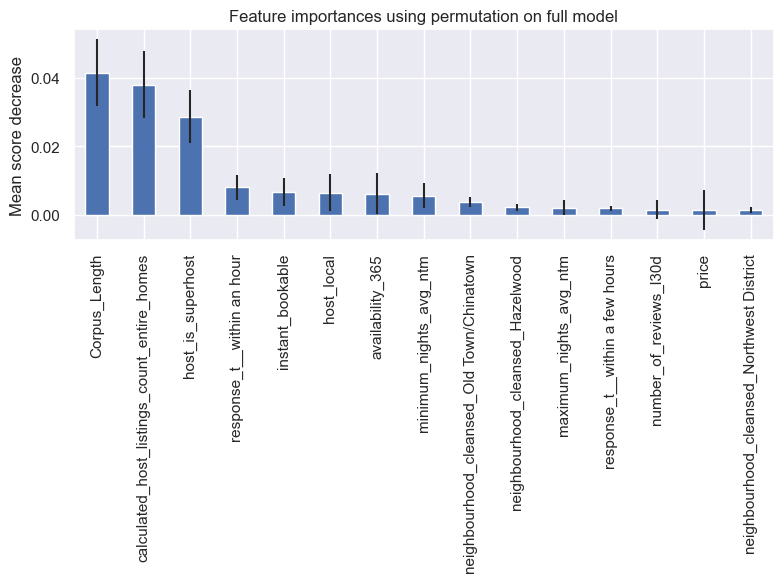

,importances_mean,importances_std
Corpus_Length,0.041463,0.009813
calculated_host_listings_count_entire_homes,0.037880,0.009742
host_is_superhost,0.028558,0.007748
response_t__within an hour,0.007947,0.003716
instant_bookable,0.006494,0.004055
host_local,0.006371,0.005428
availability_365,0.006108,0.006026
minimum_nights_avg_ntm,0.005523,0.003679
neighbourhood_cleansed_Old Town/Chinatown,0.003713,0.001402
neighbourhood_cleansed_Hazelwood,0.002179,0.001043


In [57]:
result = permutation_importance(
    best_estimator, X_test, y_test, n_repeats=100, random_state=12345, n_jobs=-1
)

feature_names = [col for col in X.columns if not col in to_drop]
forest_importances = pd.DataFrame({'importances_mean':result.importances_mean,'importances_std': result.importances_std}, index=feature_names)\
    .sort_values(by='importances_mean', ascending=False)[:15]
fig, ax = plt.subplots(figsize=(8,6))

forest_importances.importances_mean.plot.bar(yerr=forest_importances.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean score decrease")
fig.tight_layout()
plt.show()
forest_importances


# Now let's try taking Vader positive sentiment as our targets

In [ ]:
# now let's try taking the Vader positive sentiment as our targets.
y = df_ys.posVader

# split data into training/test sets with 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12345, test_size=0.20, shuffle=True)

# instantiate linear regressor
lr = LinearRegression()
# cross validate, score with neg mse and r2
cv_scores_mse = cross_val_score(estimator=lr, X=X_train, y=y_train, scoring='neg_mean_squared_error', cv=5)
cv_scores_r2 = cross_val_score(estimator=lr, X=X_train, y=y_train, scoring='r2', cv=5)

# compute rmse
rmse_lr = np.sqrt(-cv_scores_mse)

# toss into dataframe
df_training = pd.DataFrame({
    'regressor': [str(lr)],
    'mean_neg_mse': [np.mean(cv_scores_mse)],
    'mean_r2': [np.mean(cv_scores_r2)],
    'mean_rmse': [np.mean(rmse_lr)]
})

dt = DecisionTreeRegressor(random_state=12345)
rf = RandomForestRegressor(n_estimators=200, random_state=12345)
lasso = Lasso(alpha=0.1)
elasticnet = ElasticNet()
ridge = Ridge(alpha=0.5)
bagging = BaggingRegressor(random_state=12345)
gbr = GradientBoostingRegressor(n_estimators=200, random_state=12345)
regressors = [dt, rf, lasso, elasticnet, ridge, bagging, gbr]

for reg in regressors:

    # cross validate, score with neg mse and r2
    cv_scores_mse = cross_val_score(estimator=reg, X=X_train, y=np.array(y_train),scoring='neg_mean_squared_error', cv=5)
    cv_scores_r2 = cross_val_score(estimator=reg, X=X_train, y=np.array(y_train), scoring='r2', cv=5)

    # compute rmse
    rmse = np.sqrt(-cv_scores_mse)

    df_reg_eval = pd.DataFrame({
        'regressor': [str(reg)],
        'mean_neg_mse': [np.mean(cv_scores_mse)],
        'mean_r2': [np.mean(cv_scores_r2)],
        'mean_rmse': [np.mean(rmse)]
    })

    df_training = pd.concat([df_training, df_reg_eval], ignore_index=True) 
    
# regressors sorted by mean_rmse shown below
df_training.sort_values(by='mean_rmse', ascending=True)

,regressor,mean_neg_mse,mean_r2,mean_rmse
0,LinearRegression(),-3.665861e+11,-6.877064e+13,270771.552906
1,DecisionTreeRegressor(random_state=12345),-4.838122e-03,-1.627239e-01,0.069220
2,"RandomForestRegressor(n_estimators=200, random...",-2.794720e-03,3.310165e-01,0.052666
3,Lasso(alpha=0.1),-4.184811e-03,-1.924816e-03,0.064476
4,ElasticNet(),-4.184811e-03,-1.924816e-03,0.064476
5,Ridge(alpha=0.5),-2.714521e-03,3.457147e-01,0.051980
6,BaggingRegressor(random_state=12345),-2.938334e-03,2.990765e-01,0.053951
7,"GradientBoostingRegressor(n_estimators=200, ra...",-2.897166e-03,3.089647e-01,0.053579


In [ ]:
param_search = {
    'alpha': [10,1,0.5,0.1,0.01,0.001,0.0001,0] , 
    'fit_intercept': [True, False], 
    'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'saga']
}

# instantiate model (the same random forest as before)
ridge = Ridge(alpha=0.5, max_iter=20000)

# random search cv with our param search space
randomsearch = RandomizedSearchCV(ridge, param_distributions=param_search,\
                                  n_iter=20, cv=3, verbose=1, random_state=12345,\
                                  n_jobs=-1, scoring="neg_mean_squared_error") 

# fit the random search model
randomsearch.fit(X_train, y_train)

# let's take a look
best_params = randomsearch.best_params_ 
best_estimator = randomsearch.best_estimator_ 
best_score = randomsearch.best_score_

print(best_params)
print(best_estimator)
print(best_score)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'solver': 'lsqr', 'fit_intercept': True, 'alpha': 10}
Ridge(alpha=10, max_iter=20000, solver='lsqr')
-0.0026884237318254866


In [ ]:
randomsearch_cv_mse = cross_val_score(estimator=best_estimator, X=X_train, y=np.array(y_train), scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
randomsearch_cv_r2 = cross_val_score(estimator=best_estimator, X=X_train, y=np.array(y_train), scoring='r2', cv=5, n_jobs=-1)

# compute rmse
rmse = np.sqrt(-randomsearch_cv_mse)

mean_neg_mse = np.mean(randomsearch_cv_mse) 
mean_r2 = np.mean(randomsearch_cv_r2) 
mean_rmse = np.mean(rmse)

print(f'random search mean cv mse: {mean_neg_mse}')
print(f'random search mean cv r2: {mean_r2}')
print(f'random search mean cv rmse: {mean_rmse}')

random search mean cv mse: -0.0026781087300491524
random search mean cv r2: 0.35514828687373506
random search mean cv rmse: 0.05162133467287446


In [ ]:
# fitting to test
y_test_preds = best_estimator.predict(X_test)

# the final evaluation
test_mse = mean_squared_error(y_test, y_test_preds)
test_r2 = r2_score(y_test, y_test_preds)
test_rmse = np.sqrt(test_mse)

# print out results
print('random search final evaluation:')
print(f'test set mse: {test_mse}')
print(f'test set r2: {test_r2}')
print(f'test set rmse: {test_rmse}')

random search final evaluation:
test set mse: 0.0030178921293894
test set r2: 0.32942928555880724
test set rmse: 0.054935344991994


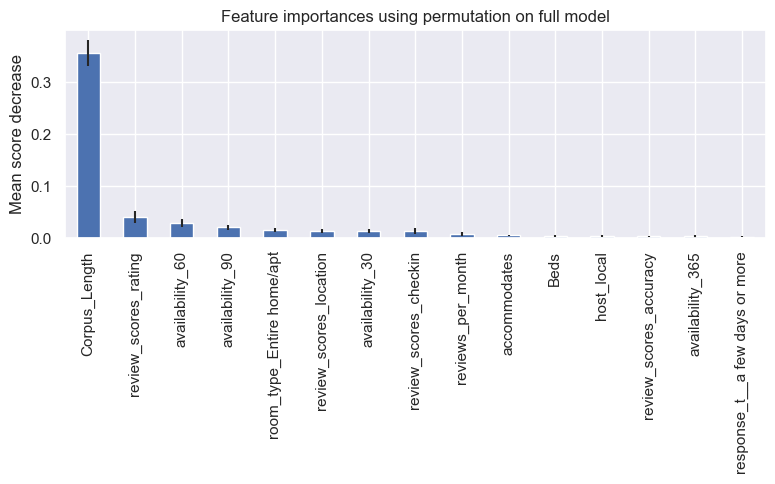

,importances_mean,importances_std
Corpus_Length,0.355556,0.025190
review_scores_rating,0.040178,0.011189
availability_60,0.028171,0.007555
availability_90,0.020326,0.005161
room_type_Entire home/apt,0.015069,0.003512
review_scores_location,0.013730,0.003747
availability_30,0.013507,0.004413
review_scores_checkin,0.013005,0.005405
reviews_per_month,0.008405,0.003542
accommodates,0.005045,0.001737


In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    best_estimator, X_test, y_test, n_repeats=1000, random_state=12345, n_jobs=-1
)

feature_names = X.columns
forest_importances = pd.DataFrame({'importances_mean':result.importances_mean,'importances_std': result.importances_std}, index=feature_names)\
    .sort_values(by='importances_mean', ascending=False)[:15]
fig, ax = plt.subplots(figsize=(8,5))

forest_importances.importances_mean.plot.bar(yerr=forest_importances.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean score decrease")
fig.tight_layout()
plt.show()
forest_importances